In [1]:
from qiskit import transpile, QuantumCircuit, Aer, assemble
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import array_to_latex, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import PhaseOracle
import numpy as np

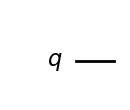

In [2]:
test_y = QuantumCircuit(1)
test_y.draw("mpl")

In [3]:
st = Statevector(test_y)
st.draw("latex")

<IPython.core.display.Latex object>

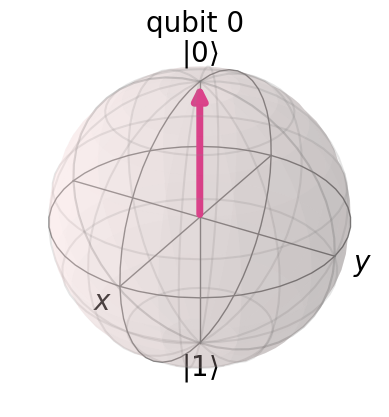

In [4]:
plot_bloch_multivector(test_y)

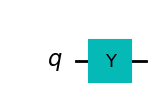

In [6]:
test_y.y(0)
test_y.draw("mpl")

In [7]:
st = Statevector(test_y)
st.draw("latex")

<IPython.core.display.Latex object>

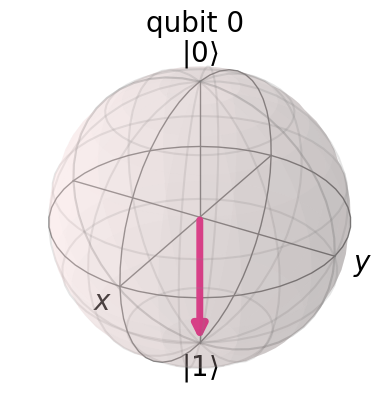

In [8]:
plot_bloch_multivector(test_y)

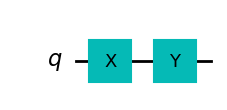

In [9]:
test_y = QuantumCircuit(1)
test_y.x(0)
test_y.y(0)
test_y.draw("mpl")

In [10]:
st = Statevector(test_y)
st.draw("latex")

<IPython.core.display.Latex object>

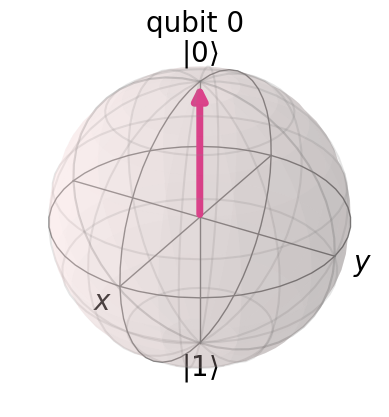

In [11]:
plot_bloch_multivector(test_y)

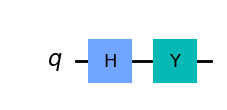

In [19]:
test_y = QuantumCircuit(1)
test_y.h(0)
test_y.y(0)
test_y.draw("mpl")


In [20]:
st = Statevector(test_y)
st.draw("latex")

<IPython.core.display.Latex object>

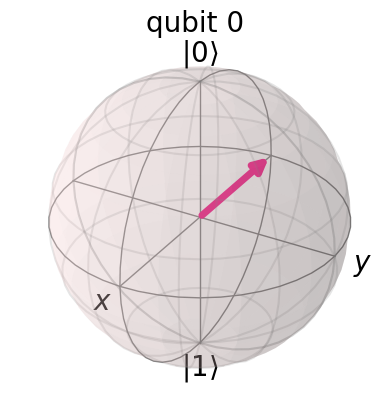

In [21]:
plot_bloch_multivector(st)

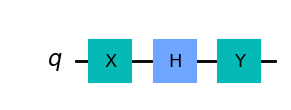

In [22]:
test_y = QuantumCircuit(1)
test_y.x(0)
test_y.h(0)
test_y.y(0)
test_y.draw("mpl")

In [23]:
st = Statevector(test_y)
st.draw("latex")

<IPython.core.display.Latex object>

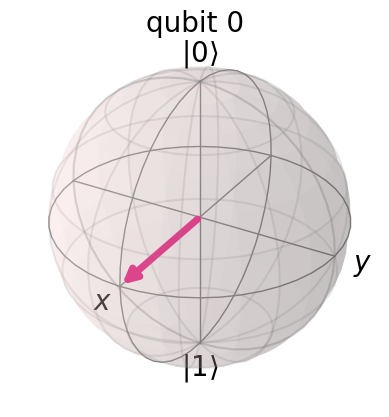

In [24]:
plot_bloch_multivector(st)

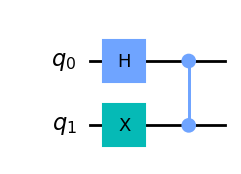

In [51]:
superposition_z_test = QuantumCircuit(2)
#superposition_z_test.x(0)
superposition_z_test.x(1)
superposition_z_test.h(0)

superposition_z_test.cz(0, 1)
superposition_z_test.draw("mpl")

In [52]:
st = Statevector(superposition_z_test)
st.draw("latex")

<IPython.core.display.Latex object>

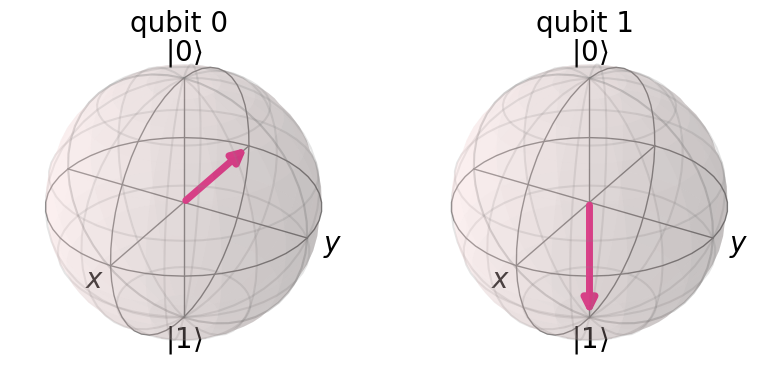

In [53]:
plot_bloch_multivector(st)

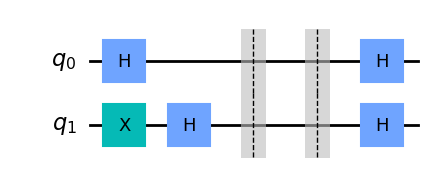

In [206]:
rotate_z_cx = QuantumCircuit(2)

"""
#it will be always sqrt(2)/2 |00> + sqrt(2)/2 |01>
rotate_z_cx.cx(0, 1)
rotate_z_cx.h(0)
"""

"""
# it will be always sqrt(2)/2 |00> + sqrt(2)/2 |11>
rotate_z_cx.h(0)
rotate_z_cx.cx(0, 1)
"""

"""
# it will be always sqrt(2)/2 |00> + sqrt(2)/2 |10>
rotate_z_cx.h(1)
rotate_z_cx.cx(0, 1)
"""

"""
# it will be always sqrt(2)/2 |00> + sqrt(2)/2 |10>
rotate_z_cx.cx(0, 1)
rotate_z_cx.h(1)
"""

"""
# it will be always 1/2 |00> + 1/2 |01> + 1/2 |10> - 1/2 |11> (it is result of the last H gate when the first one is 1 resulting in 1/sqrt(2) -1/sqrt(2)
rotate_z_cx.h(0)
rotate_z_cx.cx(0, 1)
rotate_z_cx.h(0)
"""

"""
# it's always |00> once the control is never 1
rotate_z_cx.h(1)
rotate_z_cx.cx(0, 1)
rotate_z_cx.h(1)
"""

"""
# it's always |00> once the last H gates cancel the first ones
rotate_z_cx.h(0)
rotate_z_cx.h(1)
rotate_z_cx.cx(0, 1)
rotate_z_cx.h(1)
rotate_z_cx.h(0)
"""

"""
rotate_z_cx.x(1)
rotate_z_cx.h(0)
rotate_z_cx.h(1)
rotate_z_cx.cx(0, 1)
rotate_z_cx.h(0)
"""
rotate_z_cx.h(0)
rotate_z_cx.x(1)
rotate_z_cx.h(1)

rotate_z_cx.barrier()
#rotate_z_cx.cx(0, 1)
#rotate_z_cx.x(1)

rotate_z_cx.barrier()
rotate_z_cx.h(1)
rotate_z_cx.h(0)

rotate_z_cx.draw('mpl')

In [207]:
st = Statevector(rotate_z_cx)
st.draw("latex")

<IPython.core.display.Latex object>

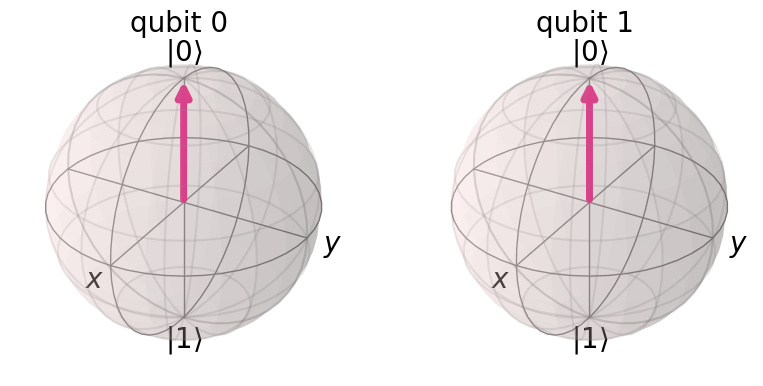

In [118]:
plot_bloch_multivector(st)

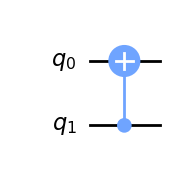

In [119]:
test_identity_cx = QuantumCircuit(2)
test_identity_cx.cx(1, 0)
test_identity_cx.draw("mpl")

In [120]:
st = Statevector(test_identity_cx)
st.draw("latex")

<IPython.core.display.Latex object>

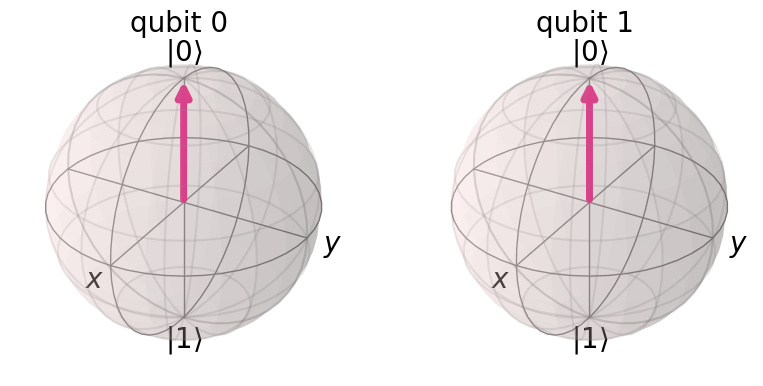

In [121]:
plot_bloch_multivector(st)

In [163]:
from qiskit import QuantumCircuit
import numpy as np

def deutsch_problem(seed=None):
    """Returns a circuit that carries out the function
    from Deutsch's problem.
    Args:
        seed (int): If set, then returned circuit will
            always be the same for the same seed.
    Returns: QuantumCircuit
    """
    np.random.seed(seed)
    problem = QuantumCircuit(2)
    
    balanced = np.random.randint(2)
    
    if balanced:
        print("Function is balanced.")
        problem.cx(0, 1)
    else:
        print("Function is constant.")

    if np.random.randint(2):
        problem.x(1)
    
    return { "circuit":problem, "balanced":bool(balanced) } 

In [216]:
def deutsch(function):
    """Implements Deutsch's algorithm.

    Args:
        function (QuantumCircuit): Deutsch function to solve.
            Must be a 2-qubit circuit, and either balanced,
            or constant.
    Returns:
        bool: True if the circuit is balanced, otherwise False.
    """
    
    encode = QuantumCircuit(2, 2)
    encode.h(0)
    
    encode.x(1)
    encode.h(1)
    encode.barrier()
    
    
    circuit = function
    new_circuit = encode.compose(circuit)
    
    new_circuit.barrier()
    new_circuit.h(0)
    new_circuit.h(1)
    new_circuit.measure([0, 1], [0, 1])
    
    print(new_circuit)
    
    sim = AerSimulator().run(new_circuit).result().get_counts()
    
    resulting_bits = list(sim.keys())[0]
    print('resultado: ', resulting_bits)
    return resulting_bits == '11'

    # your code here

In [217]:
for i in range(100):
    problem = deutsch_problem()
    circuit = problem["circuit"]
    balanced = problem["balanced"]
    
    assert balanced == deutsch(circuit)


Function is balanced.
     ┌───┐      ░       ░ ┌───┐┌─┐   
q_0: ┤ H ├──────░───■───░─┤ H ├┤M├───
     ├───┤┌───┐ ░ ┌─┴─┐ ░ ├───┤└╥┘┌─┐
q_1: ┤ X ├┤ H ├─░─┤ X ├─░─┤ H ├─╫─┤M├
     └───┘└───┘ ░ └───┘ ░ └───┘ ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1 
resultado:  11
Function is balanced.
     ┌───┐      ░            ░ ┌───┐┌─┐   
q_0: ┤ H ├──────░───■────────░─┤ H ├┤M├───
     ├───┤┌───┐ ░ ┌─┴─┐┌───┐ ░ ├───┤└╥┘┌─┐
q_1: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░─┤ H ├─╫─┤M├
     └───┘└───┘ ░ └───┘└───┘ ░ └───┘ ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1 
resultado:  11
Function is balanced.
     ┌───┐      ░       ░ ┌───┐┌─┐   
q_0: ┤ H ├──────░───■───░─┤ H ├┤M├───
     ├───┤┌───┐ ░ ┌─┴─┐ ░ ├───┤└╥┘┌─┐
q_1: ┤ X ├┤ H ├─░─┤ X ├─░─┤ H ├─╫─┤M├
     └───┘└───┘ ░ └───┘ ░ └───┘ ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1 
resultado:  11
Function is constant.
     ┌───┐      ░  ░ ┌───┐┌─┐   
q